# Mapamundi correlaciones

This Jupyter notebook generates a world heatmap to visualize the Pearson correlation values for each nationality and economic sector. To use this notebook, you need to have the 'Df_Correlacion.csv' file (which can be obtain from the 'Correlacion_Sector-Nacionalidad.ipynb notebook or from the data repository).

In [1]:
#Import the geopandas and plt library to plot the heat map.
import geopandas
import matplotlib.pyplot as plt

#Load the world data.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]

world

C:\Users\juanc\AppData\Local\Temp\ipykernel_22692\3104177111.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [2]:
#Import pandas library to load the dataset used.
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv("Df_Correlacion.csv", sep=";", encoding="utf-8")
df.rename(columns={"Unnamed: 0": "Nacionalidad"}, inplace=True)

#Load the data set to have also the country name in english.
paises = pd.read_csv("paises.csv", sep=",", encoding = "utf-8")

#Combine both datasets.
df = df.merge(paises, left_on="Nacionalidad", right_on='nombre', how="left")

df

,Nacionalidad,Construccion,Industria,Primario,Servicios,nombre,name,nom,iso2,iso3,phone_code
0,Afganistán,-0.038930,-0.087710,-0.086712,0.126951,Afganistán,Afghanistan,Afghanistan,AF,AFG,93
1,Albania,0.158400,-0.282747,0.035025,0.201210,Albania,Albania,Albanie,AL,ALB,355
2,Alemania,-0.083057,-0.381634,-0.073590,0.401350,Alemania,Germany,Allemagne,DE,DEU,49
3,Andorra,0.005735,-0.192325,0.014915,0.167443,Andorra,Andorra,Andorra,AD,AND,376
4,Angola,-0.094147,-0.047442,0.016203,0.061640,Angola,Angola,Angola,AO,AGO,244
...,...,...,...,...,...,...,...,...,...,...,...
112,Ucrania,0.330628,-0.095001,0.103441,-0.044956,Ucrania,Ukraine,L'Ukraine,UA,UKR,380
113,Uruguay,0.206383,-0.327082,-0.003716,0.245446,Uruguay,Uruguay,Uruguay,UY,URY,598
114,Uzbekistán,0.080048,-0.182031,-0.012113,0.150180,Uzbekistán,Uzbekistan,L'Ouzbékistan,UZ,UZB,998
115,Venezuela,-0.187124,-0.409065,-0.127851,0.477219,Venezuela,Venezuela,Venezuela,VE,VEN,58


In [3]:
# Merge with the GeoPandas shapefile using ISO_A3 codes
world_data = world.merge(df, left_on="name", right_on=" name", how="left")

world_data.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'Nacionalidad', 'Construccion', 'Industria', 'Primario', 'Servicios',
       'nombre', ' name', ' nom', ' iso2', ' iso3', ' phone_code'],
      dtype='object')

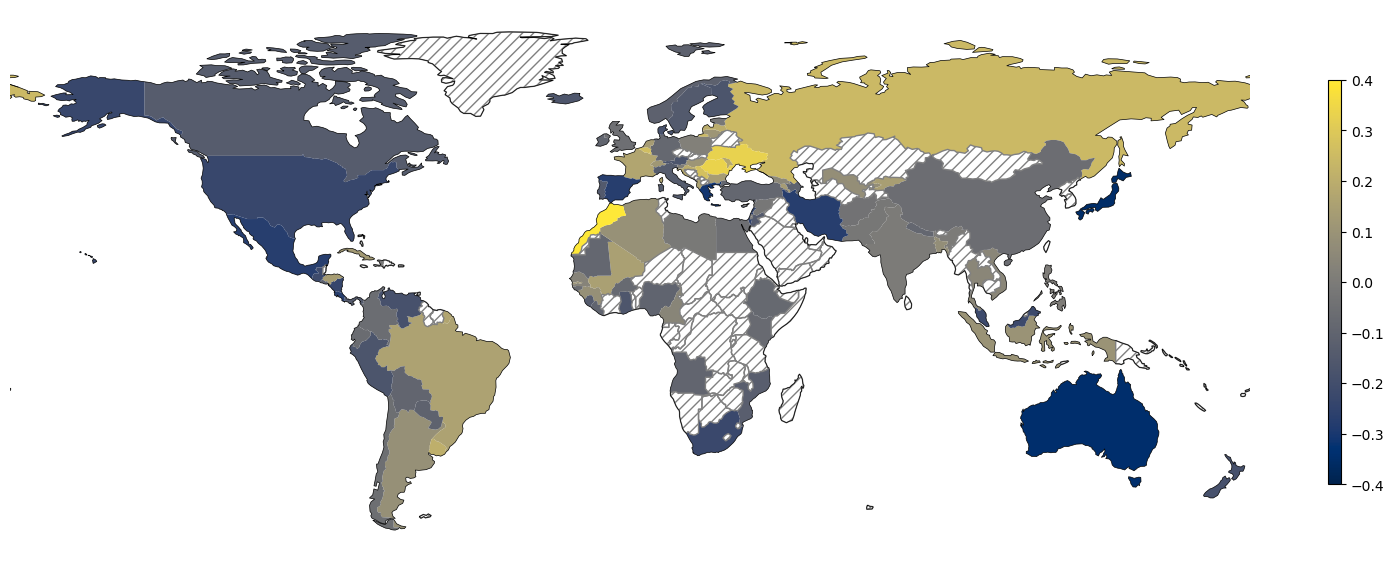

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(1, 1, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Plotear los datos del mundo
world_data.plot(
    column='Construccion',
    cmap='cividis',          # Paleta para daltónicos
    legend=True,             # Mostrar la barra de color
    legend_kwds={
        'shrink': 0.35,       # Hacer la barra más pequeña
        'orientation': 'vertical',  # Orientación de la barra
        'aspect': 30,        # Relación de aspecto de la barra
    },
    missing_kwds={
        "color": "none",         # Sin color sólido
        "edgecolor": "grey",     # Bordes grises de los países
        "hatch": "///",          # Hachurado diagonal para áreas faltantes
        "label": "No Data",
    },
    vmin=-0.4,                  # Valor mínimo de la escala
    vmax=0.4,                # Valor máximo de la escala
    ax=ax,
    transform=ccrs.PlateCarree()  # Especificar la proyección de los datos
)


# Agregar las líneas de costa
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)

# Configuraciones adicionales del mapa
ax.axis('off')  # Desactivar ejes
plt.draw()
fig.savefig("Sector_construccion.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig)

# Mostrar el mapa
